# Exploratory analysis of GitHub data 

**Note:** We are not working with the whole GHTorrent data but with a subset of it.

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
github_data = pd.concat([pd.read_csv(filename) for filename in glob.glob('../data/raw/github_data/*')])

/Users/kstathou/anaconda/envs/nesta/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/kstathou/anaconda/envs/nesta/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/kstathou/anaconda/envs/nesta/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
github_data.head(2)

,project_name,project_description,project_url,project_language,project_creation_date,project_forked_from,project_id,user_login,user_company,user_creation_date,user_type,user_longitude,user_latitude,user_state,user_city,user_id,user_country_code
0,gradle-pitest-plugin,Gradle plugin for PIT Mutation Testing,https://api.github.com/repos/ZsoltFabok/gradle...,Groovy,2017-04-23 08:22:38 UTC,240817.0,63064607,ZsoltFabok,Independent,2010-06-20 19:37:11 UTC,USR,19.122980,47.513031,Budapest,Budapest,381610,hu
1,RedQueen_Vitro,In vitro molecular evolution,https://api.github.com/repos/dormanm/RedQueen_...,Perl,2015-12-23 21:15:18 UTC,30204643.0,30205482,dormanm,"University of Dublin, Trinity College",2015-04-15 09:18:58 UTC,USR,-8.196102,53.182728,NaN,NaN,10843175,ie


In [4]:
github_data.isnull().sum()

project_name                  146
project_description       5262315
project_url                     0
project_language          6618233
project_creation_date           0
project_forked_from      11062307
project_id                      0
user_login                      0
user_company             10372659
user_creation_date              0
user_type                       0
user_longitude                  0
user_latitude                   0
user_state                3545972
user_city                 5073441
user_id                         0
user_country_code               0
dtype: int64

In [5]:
github_data.shape

(19159174, 17)

In [6]:
# Users and organisations
github_data.drop_duplicates('user_id').user_type.value_counts()

USR    1124583
ORG      94938
Name: user_type, dtype: int64

## Visualisations

In [7]:
# Keep only the year that a project or user was created
github_data['project_year'] = github_data.project_creation_date.apply(lambda x: x[:4])
github_data['user_year'] = github_data.user_creation_date.apply(lambda x: x[:4])

In [8]:
# Removing 2018 because it's not a full year
github_data = github_data[github_data.user_year != '2018']
github_data = github_data[github_data.project_year != '2018']
github_data.reset_index(inplace=True, drop=True)

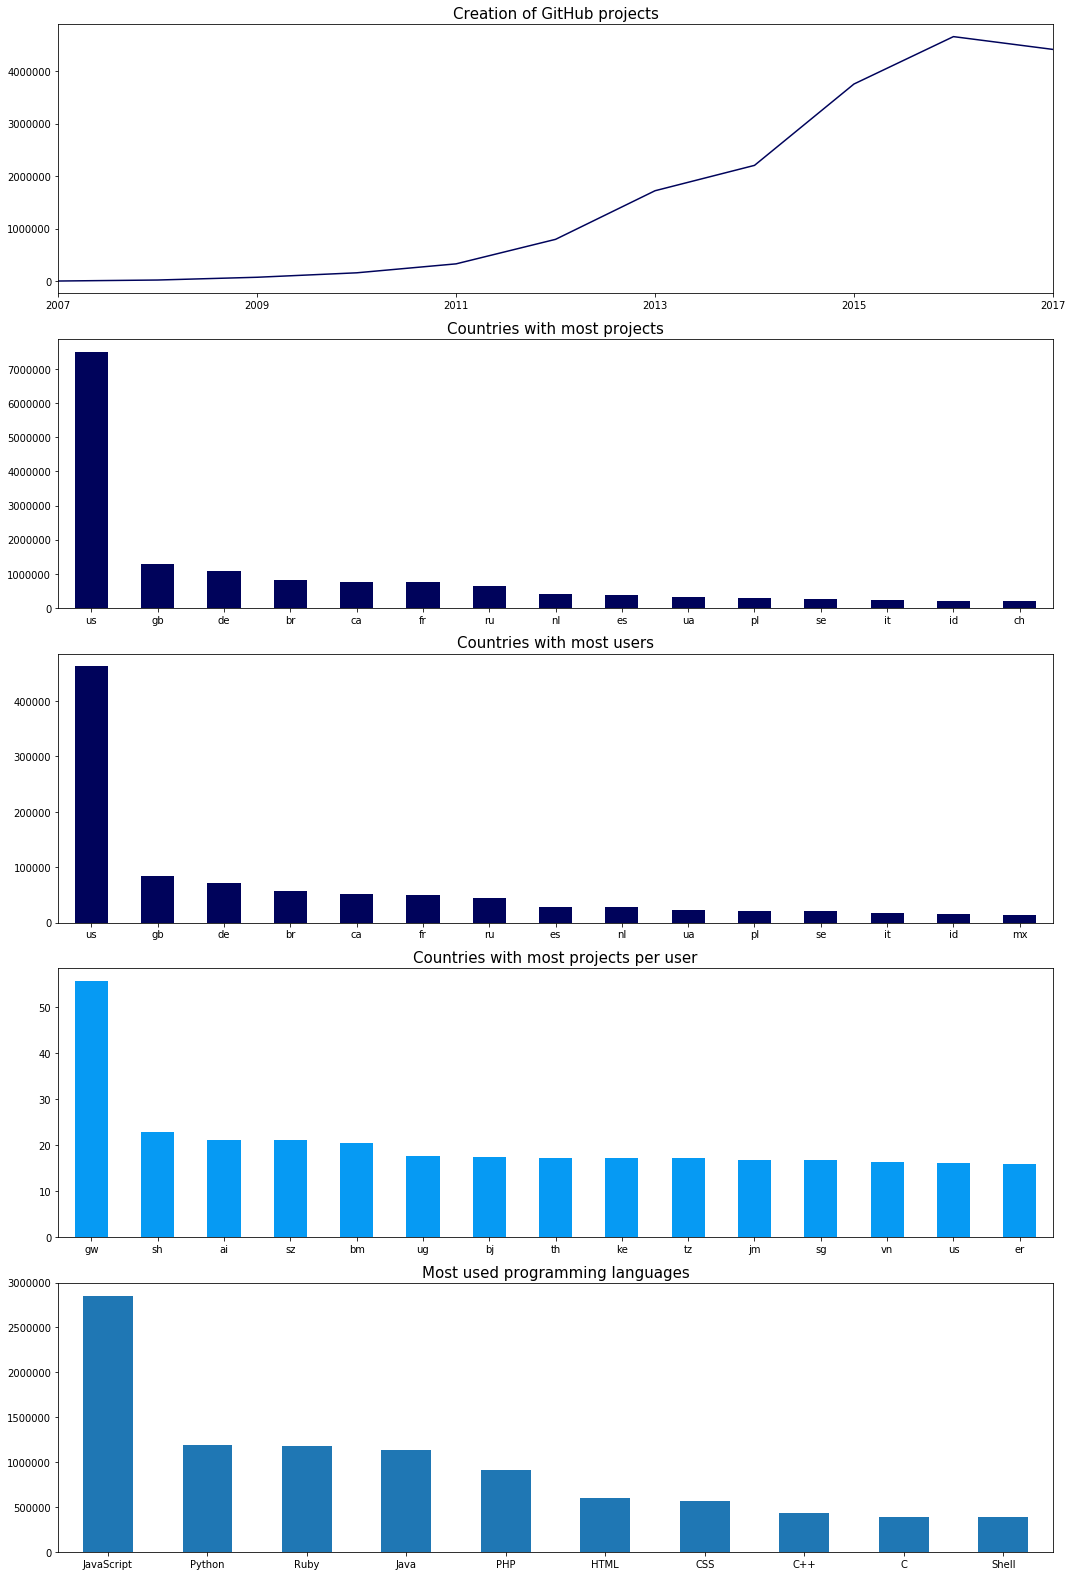

In [9]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, figsize=(15,22))

# ax1 - Total number of projects
github_data.drop_duplicates('project_id').groupby('project_year').count()['project_id'].plot(ax=ax1, color='xkcd:dark blue')
ax1.set_title('Creation of GitHub projects', fontsize=15)
ax1.set_xlabel('')

# ax2 - Countries with most projects (raw project frequency)
top_countries_proj = github_data.drop_duplicates('project_id').user_country_code.value_counts(ascending=False)
top_countries_proj.loc[top_countries_proj.index[:15], ].plot(kind='bar', color='xkcd:dark blue', ax=ax2, rot=0)
ax2.set_title('Countries with most projects', fontsize=15)
ax2.set_xlabel('')

# ax3 - Countries with most users (raw user frequency)
top_countries_usr = github_data.drop_duplicates('user_id').user_country_code.value_counts(ascending=False)
top_countries_usr.loc[top_countries_usr.index[:15], ].plot(kind='bar', color='xkcd:dark magenta', ax=ax3, rot=0)
ax3.set_title('Countries with most users', fontsize=15)
ax3.set_xlabel('')

# ax4 - Countries with highest number of projects per user
norm_proj = top_countries_proj.div(top_countries_usr)
norm_proj.sort_values(ascending=False)[:15].plot(kind='bar', color='xkcd:azure', ax=ax4, rot=0)
ax4.set_title('Countries with most projects per user', fontsize=15)
ax4.set_xlabel('')

# ax5 - Most used programming languages
github_data.drop_duplicates('project_id').project_language.value_counts(ascending=False)[:10].plot(kind='bar', rot=0, ax=ax5)
ax5.set_title('Most used programming languages', fontsize=15)
ax5.set_xlabel('')

plt.tight_layout()
plt.show()

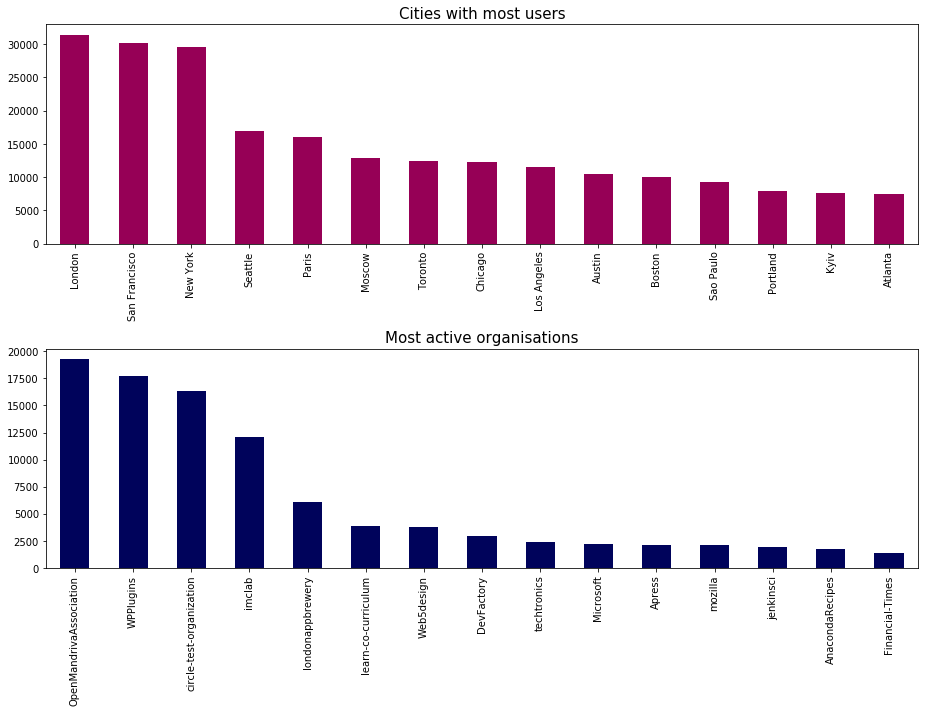

In [10]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13,10))

# ax1 - Cities with most users
github_data.drop_duplicates('user_id').user_city.value_counts(ascending=False)[:15].plot(kind='bar', ax=ax1, color='xkcd:dark magenta')
ax1.set_title('Cities with most users', fontsize=15)
ax1.set_xlabel('')

# ax2 - Most active organisations
active_orgs = github_data[github_data.user_type=='ORG'].user_id.value_counts(ascending=False)[:15]
github_data[github_data.user_type=='ORG'].user_id.value_counts(ascending=False)[:15].plot(kind='bar', ax=ax2, color='xkcd:dark blue')
ax2.set_xticklabels([github_data[github_data.user_id==idx]['user_login'].iloc[0] for idx in active_orgs.index])
ax2.set_title('Most active organisations', fontsize=15)
ax2.set_xlabel('')

plt.tight_layout()
plt.show()